In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [9]:
# Load datasets

athletes = pd.read_csv('C:/Users/WEL43591/OneDrive - Spectrum Health/Documents/Wela docs/LinkedIn Learning/Python/Olympics 2020/athlete_events.csv')

regions = pd.read_csv('C:/Users/WEL43591/OneDrive - Spectrum Health/Documents/Wela docs/LinkedIn Learning/Python/Olympics 2020/noc_regions.csv')

In [7]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [11]:
# Join the datasets using Pandas merge function 

athletes_df = athletes.merge(regions, how = 'left', on = 'NOC')

athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
# Shape of Dataset

athletes_df.shape

(271116, 17)

In [16]:
# Renaming Column names for consistency

athletes_df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace=True);

athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [17]:
# We can tell which columns have missing values

athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [18]:
# Displaying statistical summary
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [22]:
# Checking for null values

nan_values = athletes_df.isna()
nan_columns = nan_values.any()

nan_columns

# True shows columns with missing values

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [23]:
# Showing number of rows with missing values
# For the column medals - missing values show athletes who got no medals
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [24]:
# Subsetting USA data only

athletes_df.query('Team == "United States"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [29]:
# Top countries participating

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Particiption BY Country'}, ylabel='Team'>

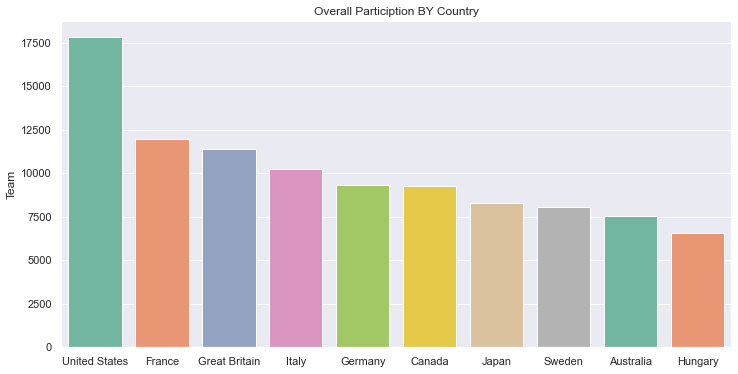

In [97]:
# Plot top 10 Countries 

plt.figure(figsize=(12,6))
plt.title('Overall Particiption BY Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette= 'Set2')

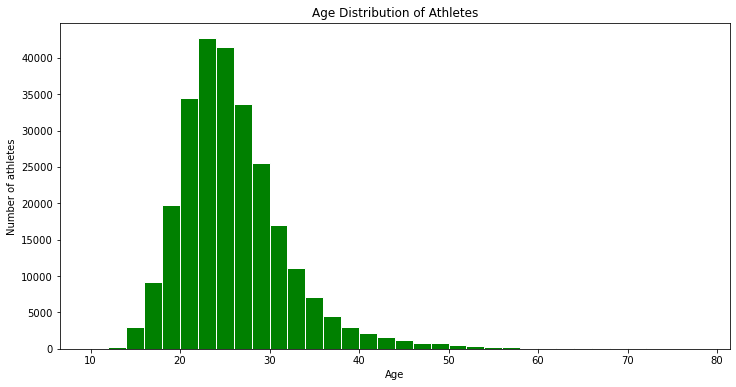

In [36]:
# Age Distribution of participants
# most athletes participating are between 20 - 30 in age

plt.figure(figsize=(12,6))
plt.title("Age Distribution of Athletes")
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.hist(athletes_df.Age, bins = np.arange(10, 80, 2), color='green', edgecolor= 'white');

In [37]:
# Winter Olympics sports

winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [38]:
# Summer Olympics
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [39]:
# Male and Female athletes

gender_count = athletes_df.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2210652aa30>,
 [Text(0.7147310163003329, -0.8361576252945934, 'M'),
  Text(-0.7147309380136028, 0.836157692212537, 'F')],
 [Text(0.38985328161836336, -0.4560859774334145, '72.5%'),
  Text(-0.3898532389165105, 0.456086013934111, '27.5%')])

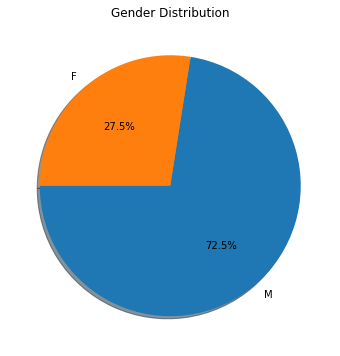

In [43]:
# Gender pie plot

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=180, shadow=True)

In [44]:
# Total Medals won

athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [45]:
# Female athletes in each olympics

female_athletes = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex', 'Year']]
female_athletes = female_athletes.groupby('Year').count().reset_index()
female_athletes.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [46]:
womenOlympics = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]

Text(0.5, 1.0, 'Women Participation')

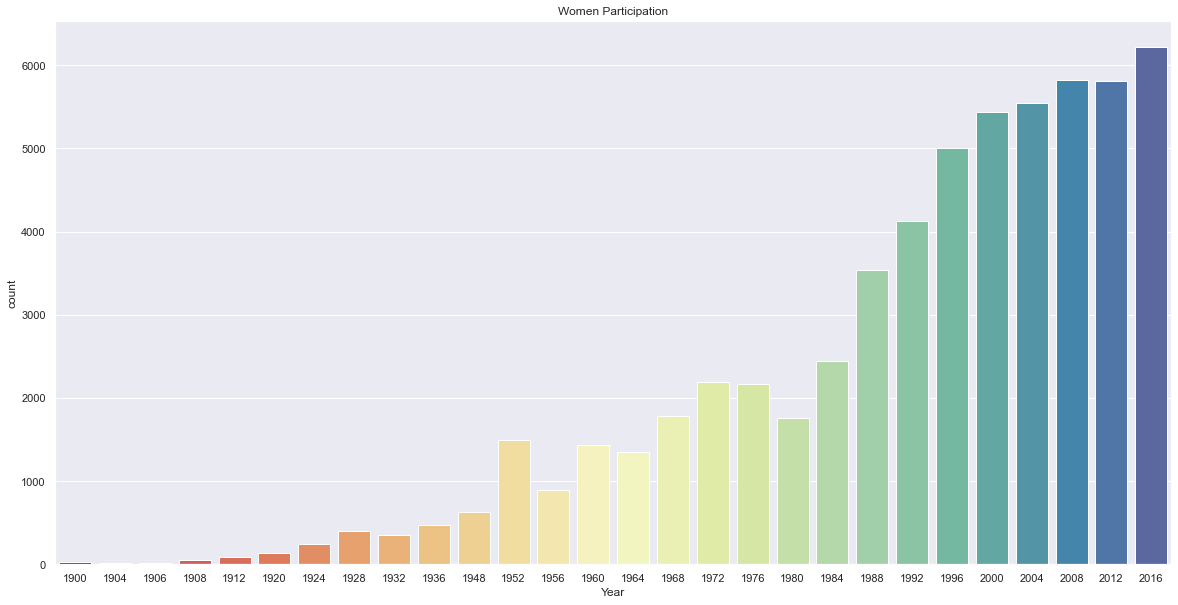

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenOlympics, palette="Spectral")
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

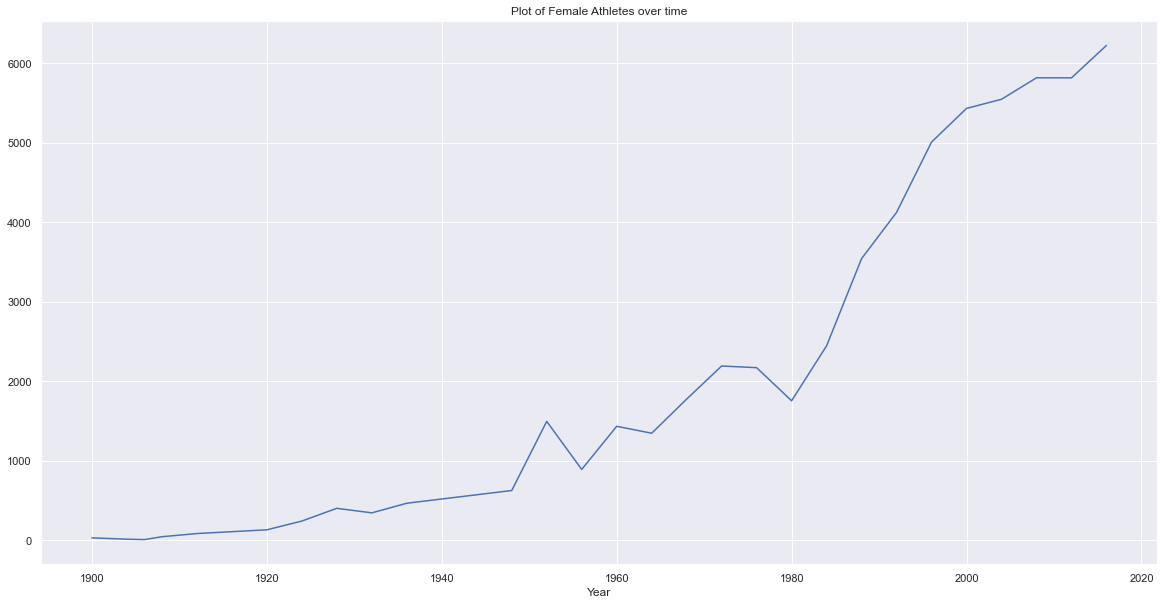

In [51]:
# Line plot over time
# shows a gradual increase of female participation especially since 1980
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:, 'F'].plot()
plt.title('Plot of Female Athletes over time')

In [52]:
# Gold medal athletes

goldMedals = athletes_df[(athletes_df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [54]:
# take only the values that are different forn NaN

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]


In [93]:
# Gold 60 years and beyond

goldMedals['ID'][goldMedals['Age']>=60].count()

10

In [94]:
sporting_event = goldMedals['Sport'][goldMedals['Age']>=60]
sporting_event

104003    Art Competitions
105199               Roque
159298            Shooting
190952             Archery
226374             Archery
233386            Shooting
233387            Shooting
233390            Shooting
261102             Archery
261675    Art Competitions
Name: Sport, dtype: object

Text(0.5, 1.0, 'Gold 60 years and beyond')

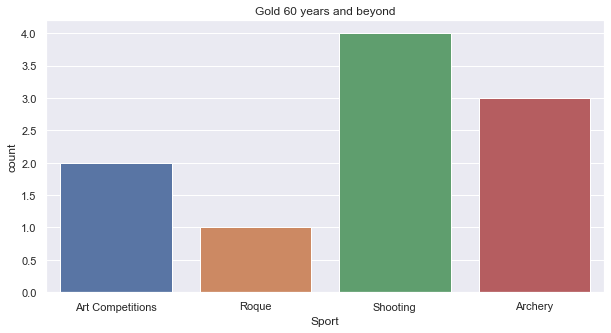

In [95]:
# Plot sporting event

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold 60 years and beyond')


In [103]:
# Gold medals from each country

goldMedals.Region.value_counts().reset_index(name='Medal').head(10)


,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Gold Medals per Country')

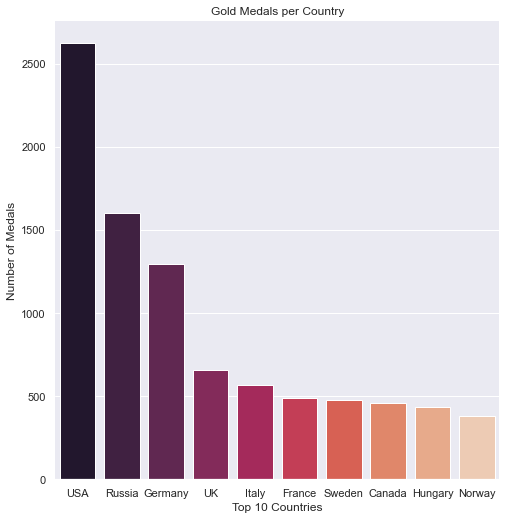

In [83]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
               height=7, kind="bar", palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 10 Countries")
g.set_ylabels("Number of Medals")
plt.title('Gold Medals per Country')

In [86]:
# Rio Olympics

max_year = athletes_df.Year.max()
print(max_year)

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, '2016 Gold Medals by Country')

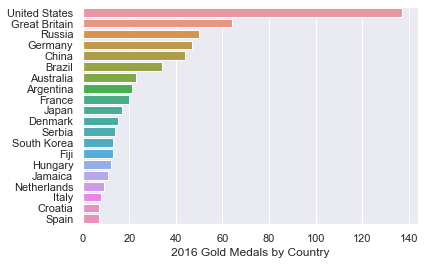

In [87]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.xlabel('2016 Gold Medals by Country')

In [88]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull())& (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

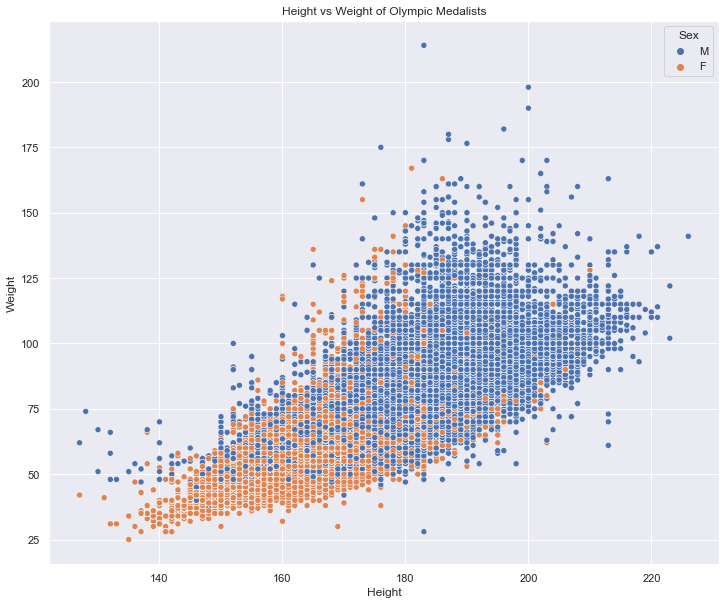

In [89]:
plt.figure(figsize = (12,10))
axis = sns.scatterplot(x="Height", y="Weight", data=not_null_medals, hue="Sex")
plt.title('Height vs Weight of Olympic Medalists')

In [107]:
# look at correlation between medalists, and gold medalits.. what influences the most..

not_null_medals.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002100,-0.011812,-0.008825,0.007352
Age,-0.002100,1.000000,0.141684,0.212041,0.089142
Height,-0.011812,0.141684,1.000000,0.796213,0.048954
Weight,-0.008825,0.212041,0.796213,1.000000,0.022649
Year,0.007352,0.089142,0.048954,0.022649,1.000000


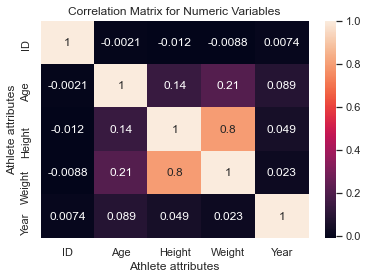

In [108]:
correlation_matrix = not_null_medals.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Athlete attributes')
plt.ylabel('Athlete attributes')

plt.show()

In [ ]:
# height and weight have the most influence in getting a medal